### File for creating "preceding  metrics" plots for predictions using the RF model I trained ...

3/6/2025

Updated 4/11/2025 for 14-days

Updated 4/16/2025 to only plot 3 features. It goes without saying that the data I used for this is not currently saved to GitHub because it is too large. 

In [1]:
#relevant import statements
import numpy as np
import math
import pandas as pd
import xarray as xr 
import pickle 
import matplotlib.pyplot as plt

Open and pre-process ellipse metrics. 

In [2]:
##open ellipse metric files
infile = open("./data/ellipse/era5_wind50_59.p", 'rb') 
wind10 = pickle.load(infile)
infile.close()

infile = open("./data/ellipse/era5_size50_59.p", 'rb') 
size10 = pickle.load(infile)
infile.close()

infile = open("./data/ellipse/era5_ratio50_59.p", 'rb') 
rat10 = pickle.load(infile)
infile.close()

infile = open("./data/ellipse/era5_ephi50_59.p", 'rb') 
ephi10 = pickle.load(infile)
infile.close()

infile = open("./data/ellipse/era5_cenlat50_59.p", 'rb')
cenlat10 = pickle.load(infile)
infile.close()

infile = open("./data/ellipse/era5_cenlon50_59.p", 'rb')
cenlon10 = pickle.load(infile)
infile.close()

infile = open("./data/gph/NA_gph_weightedANOM_500.p", 'rb') 
gph = pickle.load(infile)
infile.close()

infile = open("./data/pv/CAP_pvu_weightedANOM_100.p", 'rb') 
pv = pickle.load(infile)
infile.close()

In [3]:
#remove leap year
wind10 = np.delete(wind10,[120],1)
rat10 = np.delete(rat10,[120],1)
cenlat10 = np.delete(cenlat10,[120],1)
cenlon10 = np.delete(cenlon10,[120],1)
size10 = np.delete(size10,[120],1)
ephi10 = np.delete(ephi10,[120],1)

In [4]:
#remove NaNs
indices = np.isnan(wind10)
for i in range(0,63):
    for j in range(0,151):
        if indices[i,j] != False:
            print(i)
            print(j)
            print("True")
            wind10[i,j] = 0
            rat10[i,j] = 0
            cenlat10[i,j] = 0
            cenlon10[i,j] = 0
            size10[i,j] = 0
            ephi10[i,j] = 0

24
144
True
24
145
True
24
146
True
24
147
True
24
148
True
24
149
True
24
150
True
29
145
True
29
146
True
29
147
True
29
148
True
29
149
True
39
149
True
39
150
True
41
144
True


The initial `input` file cell here is for all eight features. The second `input2` is for plotting the 3 most important features from the RF model. 

In [5]:
input = np.empty((63,151,8))

In [6]:
input[:,:,0] = wind10[:,:]
input[:,:,1] = rat10[:,:]
input[:,:,2] = cenlat10[:,:]
input[:,:,3] = cenlon10[:,:]
input[:,:,4] = size10[:,:]
input[:,:,5] = ephi10[:,:]
input[:,:,6] = gph[:,:]
input[:,:,7] = pv[:,:]

In [7]:
##reduced
input2 = np.empty((63,137,3))
input2[:,:,0] = wind10[:,:]
input2[:,:,1] = cenlon10[:,:]
input2[:,:,2] = size10[:,:]

Now that the assembly is done ... We can plot. lol.

In [8]:
##open indice files
infile = open("./RF_indices/range_indices_RF14.p", 'rb') ##essentially just taking the ranges from the testing data (which is being plotted?)  
ranges = pickle.load(infile)
infile.close()

infile = open("./RF_indices/posXtest_RF14.p", 'rb') 
posXtest = pickle.load(infile)
infile.close()

infile = open("./RF_indices/FposXtest_RF14.p", 'rb') 
FposXtest = pickle.load(infile)
infile.close()

infile = open("./RF_indices/negXtest_RF14.p", 'rb') 
negXtest = pickle.load(infile)
infile.close()

infile = open("./RF_indices/FnegXtest_RF14.p", 'rb') 
FnegXtest = pickle.load(infile)
infile.close()

In [9]:
##reduce input to just the testing data
#nolag_Xtest = input[58:,:,:]
nolag_Xtest = input2[58:,:137,:]
nolag_Xtest.shape

(5, 151, 3)

### These few cells will be for making box plots. 

In [12]:
##Correct Positive Events
pos_corr_events = []
pos_corr_num = []
pos_corr_total_events = []

for i in range(0,5):
    for j in range(0,137):
        #index for the date being observed
        date_index = ranges[i,j]
        ##loop through indexes of positive and correct events
        for k in range(len(posXtest)):
            pos_index = posXtest[k]
            if pos_index == date_index:
                pos_corr_total_events.append(0)
                pos_corr_num.append(0)
                pos_corr_events.extend(nolag_Xtest[i,j,:])

##reshape
pos = np.array(pos_corr_events).reshape((len(pos_corr_num),1,3))
print(pos.shape)
print(len(pos_corr_total_events))
##A LOT OF THE CORRECT POSITIVE EVENTS ARE WITHIN 20 DAYS OF THE START OF THE YEAR

(1800, 14, 3)
4071


In [13]:
##FALSE Positive Events
Fpos_corr_events = []
Fpos_corr_num = []
Fpos_corr_total_events = []

for i in range(0,5):
    for j in range(0,137):
        #index for the date being observed
        date_index = ranges[i,j]
        ##loop through indexes of positive and correct events
        for k in range(len(FposXtest)):
            pos_index = FposXtest[k]
            if pos_index == date_index:
                Fpos_corr_total_events.append(0)
                Fpos_corr_num.append(0)
                Fpos_corr_events.extend(nolag_Xtest[i,j,:])
##reshape
Fpos = np.array(Fpos_corr_events).reshape((len(Fpos_corr_num),1,3))
print(Fpos.shape)
print(len(Fpos_corr_total_events))

(905, 14, 3)
905


In [15]:
##Correct Negative Events
neg_corr_events = []
neg_corr_num = []
neg_corr_total_events = []

for i in range(0,5):
    for j in range(0,137):
        #index for the date being observed
        date_index = ranges[i,j]
        ##loop through indexes of positive and correct events
        for k in range(len(negXtest)):
            neg_index = negXtest[k]
            if neg_index == date_index:
                neg_corr_total_events.append(0)
                neg_corr_num.append(0)
                neg_corr_events.extend(nolag_Xtest[i,j,:])
##reshape
neg = np.array(neg_corr_events).reshape((len(neg_corr_num),1,3))
print(neg.shape)
print(len(neg_corr_total_events))

(5995, 14, 3)
5995


In [14]:
##FALSE Negative Events
Fneg_corr_events = []
Fneg_corr_num = []
Fneg_corr_total_events = []

for i in range(0,5):
    for j in range(0,137):
        #index for the date being observed
        date_index = ranges[i,j]
        ##loop through indexes of positive and correct events
        for k in range(len(FnegXtest)):
            neg_index = FnegXtest[k]
            if neg_index == date_index:
                Fneg_corr_total_events.append(0)
                Fneg_corr_num.append(0)
                Fneg_corr_events.extend(nolag_Xtest[i,j,:])

##reshape
Fneg = np.array(Fneg_corr_events).reshape((len(Fneg_corr_num),1,3))
print(Fneg.shape)
print(len(Fneg_corr_total_events))

(2289, 14, 3)
2426


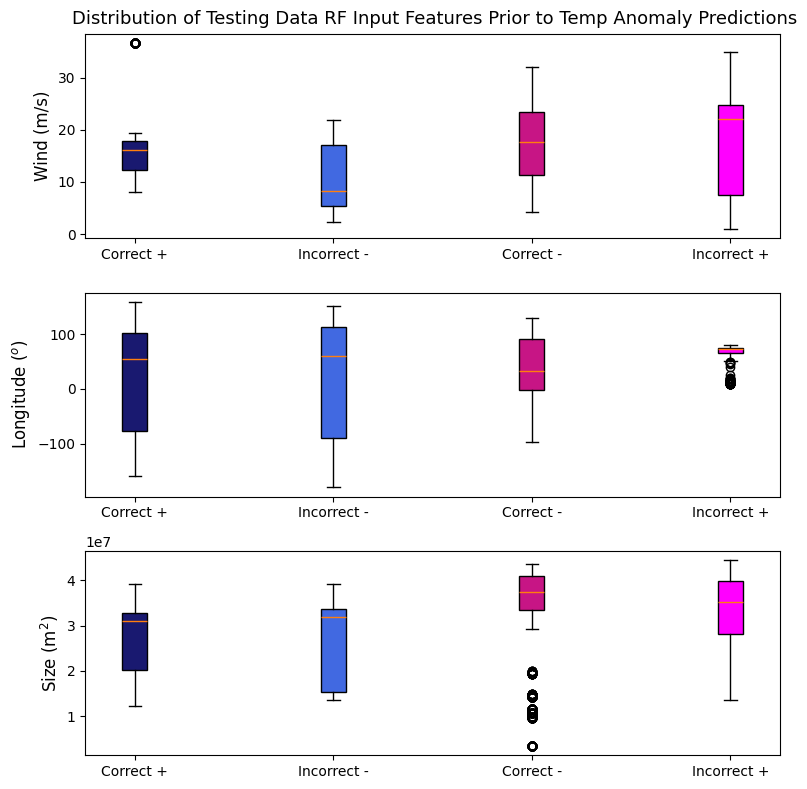

In [33]:
import matplotlib.ticker as mticker
myLocator = mticker.MultipleLocator(2)

#metrics = ["Wind (m/s)", "Ratio (m)", "Latitude ($^o$)", "Longitude ($^o$)", "Size (m$^2$)", "EPhi ($^o$)", "GPH (hPa)", "PV (m$^2$K/s kg)"]
metrics = ["Wind (m/s)", "Longitude ($^o$)", "Size (m$^2$)"]
ticks = ['Correct +', 'Incorrect -', 'Correct -', 'Incorrect +'] #set tick numbers for dataset
ind = [2, 4, 6, 8]  # the x locations for the groups
w = 0.25 #box-plot width
c = ["midnightblue","royalblue","mediumvioletred","magenta"]
fs = 12

fig, axes = plt.subplots(3, 1, figsize=(8, 8))
plt.suptitle("Distribution of Testing Data RF Input Features Prior to Temp Anomaly Predictions", fontsize = 13, x=0.55)
axes = axes.flatten()
for i in range(0,3):

    if i ==6:
        C_pos = pos[:,0,i]
        F_neg = Fneg[:,0,i]
        C_neg = neg[:,0,i]
        F_pos = Fpos[:,0,i]
        
        a1 =axes[i].boxplot([C_pos,F_neg,C_neg,F_pos], positions= [2,4,6,8], widths=w, patch_artist=True)
        for bplot in (a1,):
            for patch, color in zip(bplot['boxes'], c):
                patch.set_facecolor(color)
        axes[i].set_xticks(ind, ticks, fontsize = 10)
        axes[i].set_ylabel(str(metrics[i]), fontsize = fs)
        #axes[i].set_ylim(0,1)
    else:
        C_pos = pos[:,0,i]
        F_neg = Fneg[:,0,i]
        C_neg = neg[:,0,i]
        F_pos = Fpos[:,0,i]
        
        a1 =axes[i].boxplot([C_pos,F_neg,C_neg,F_pos], positions= [2,4,6,8], widths=w, patch_artist=True)
        for bplot in (a1,):
            for patch, color in zip(bplot['boxes'], c):
                patch.set_facecolor(color)
        axes[i].set_xticks(ind, ticks, fontsize = 10)
        axes[i].set_ylabel(str(metrics[i]), fontsize = fs)
        #axes[i].set_ylim(0,1)
    

plt.tight_layout()
plt.subplots_adjust(top=0.95)   
plt.savefig("RF_features_beforePRED_BOXPLOT_14days.png")
plt.show()